Lab 7

We will be looking for places to do cut in the data in order to increase the significance of measurement of our signal. We will do this be making cuts that removes background and leaves as much of the signal in. we will look at mass cuts first. But before that let us take a closer to look at the uncut data.

In [26]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,3)

In [27]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)


higgsData = pd.DataFrame(new_dict)
# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [28]:

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)

qcdData = pd.DataFrame(new_dict)

# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [29]:
higgsData.shape

(100000, 14)

1.

So from the documentation we see that we would expect 50 higgs events and a 2000 background events for a run of this length. As a reference lets calculate the significance of seeing 2050 events in a run (the higgs events plus the background event) without a cut.

We have a Poisson distributed background since we are looking at counts of independent events, we have a mean of 2000 of the background


In [30]:
#sig calc
p = (1-scipy.stats.poisson.cdf(2050, 2000))
print('We get a simga significance of {0:1.2f}'.format(stats.norm.ppf(1-p)))

We get a simga significance of 1.13


So this signal is not significant. let’s do a quick check that this matches what we would expect from a the significances of poison since the width of a Poisson is the square root of the mean, and we have a large enough mean so that it can be approximated as a Gaussian the expression  N_higs/(N_qcd)^1/2 should approximately match the 1.1 significance we just calculated below we see that it does to two sig figs. 

In [31]:
print('{0:1.2f}'.format(50/np.sqrt(2000)))

1.12


2.
Now to do some cuts 
We want to do cuts that will cut the qcd background but keep as much of the higgs signal as possible since the signals is week to begin with, we also want to keep track of how much of the signal we are keeping since cutting to much signal is an issue especially when doing multiple cuts.  

To help chose were to do the mass cut we will graph out the histogram of both the background and higgs data, (all the histograms that will be plotted are of non-normalized data this makes the plots better for finding places to cut since we are over representing the higgs data in the cut, the data will be normalized when finding the significance of the cut though as well as when displaying the number of higgs events left after cuts)




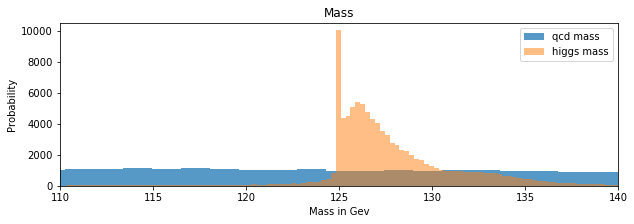

In [32]:
plt.hist(qcdData['mass'], bins=500, density= False,label ='qcd mass',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['mass'], bins=500, density= False,label ='higgs mass',alpha=0.5)
plt.show
plt.title('Mass')
plt.ylabel('Probability')
plt.xlabel('Mass in Gev')
plt.xlim([110,140])
plt.legend()

Now lets try systimitic cuts of this datat around 120 and 140 Gev

In [33]:
def cut(low,high,feature,signal,bkgd):
    bkgdDataCut =bkgd[ bkgd[feature]>low]
    bkgdDataCut=bkgdDataCut[bkgdDataCut[feature]<high]
    
    signalDatacut=signal[signal[feature]>low]
    signalDatacut=signalDatacut[signalDatacut[feature]<high]
    
    bkgdMean = 2000 * len(bkgdDataCut[feature])/len(qcdData[feature])
    
    signalMean = 50 * len(signalDatacut[feature])/len(higgsData[feature])
    
    p = (1-scipy.stats.poisson.cdf(bkgdMean+signalMean, bkgdMean))
    print('We get a simga significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),low,high))
    print('number of higgs signla left {0:1.1f}'.format(signalMean))
    print('number of background signla left {0:1.1f}'.format(bkgdMean))
    #print(signalMean)
    
    return(signalDatacut,bkgdDataCut)

In [34]:
sig,bac=cut(0,2000,'mass',higgsData,qcdData)
sig,bac=cut(120,140,'mass',higgsData,qcdData)
sig,bac=cut(124.5,140,'mass',higgsData,qcdData)
x=cut(124.5,138,'mass',higgsData,qcdData)
print("")
x=cut(120,130,'mass',higgsData,qcdData)
print("")
x=cut(125,130,'mass',higgsData,qcdData)
x=cut(125,129,'mass',higgsData,qcdData)
x=cut(125,128,'mass',higgsData,qcdData)
x=cut(125,127,'mass',higgsData,qcdData)
print("")
x=cut(124,140,'mass',higgsData,qcdData)
x=cut(124,130,'mass',higgsData,qcdData)
x=cut(124,130,'mass',higgsData,qcdData)
x=cut(124,129,'mass',higgsData,qcdData)
x=cut(124,128,'mass',higgsData,qcdData)
x=cut(124,127,'mass',higgsData,qcdData)
x=cut(124,126,'mass',higgsData,qcdData)
print("")
x=cut(124.5,129,'mass',higgsData,qcdData)
print("")
x=cut(123,140,'mass',higgsData,qcdData)
x=cut(123,130,'mass',higgsData,qcdData)
x=cut(123,130,'mass',higgsData,qcdData)
x=cut(123,129,'mass',higgsData,qcdData)
x=cut(123,128,'mass',higgsData,qcdData)
x=cut(123,127,'mass',higgsData,qcdData)
x=cut(123,126,'mass',higgsData,qcdData)

We get a simga significance of 1.128 for a cut from 0.0 to 2000.0
number of higgs signla left 50.0
number of background signla left 2000.0
We get a simga significance of 2.907 for a cut from 120.0 to 140.0
number of higgs signla left 47.6
number of background signla left 250.3
We get a simga significance of 3.207 for a cut from 124.5 to 140.0
number of higgs signla left 46.2
number of background signla left 191.6
We get a simga significance of 3.440 for a cut from 124.5 to 138.0
number of higgs signla left 45.9
number of background signla left 168.1

We get a simga significance of 3.239 for a cut from 120.0 to 130.0
number of higgs signla left 37.9
number of background signla left 128.3

We get a simga significance of 3.971 for a cut from 125.0 to 130.0
number of higgs signla left 33.8
number of background signla left 63.5
We get a simga significance of 4.021 for a cut from 125.0 to 129.0
number of higgs signla left 30.8
number of background signla left 50.5
We get a simga significance

Now we can take the cut that would be give use the most significance, if we were to do that we would want to cut from 124.8 to 129 Gev which would give use a sigma value of 4.227. 


In [35]:
higgsDataCut, qcdDataCut=cut(124.8,129,'mass',higgsData,qcdData)
#len(higgsDataCut)

We get a simga significance of 4.227 for a cut from 124.8 to 129.0
number of higgs signla left 33.2
number of background signla left 53.0


3.

Now we can look for other places to do cuts, we want to look for features that are similar to the effectiveness of a mass cut first and then for features that we can use to further cut the data after making a mass cut. we will start with the first of the two by overlaying background and signal histograms and seeing which one overlap the least.

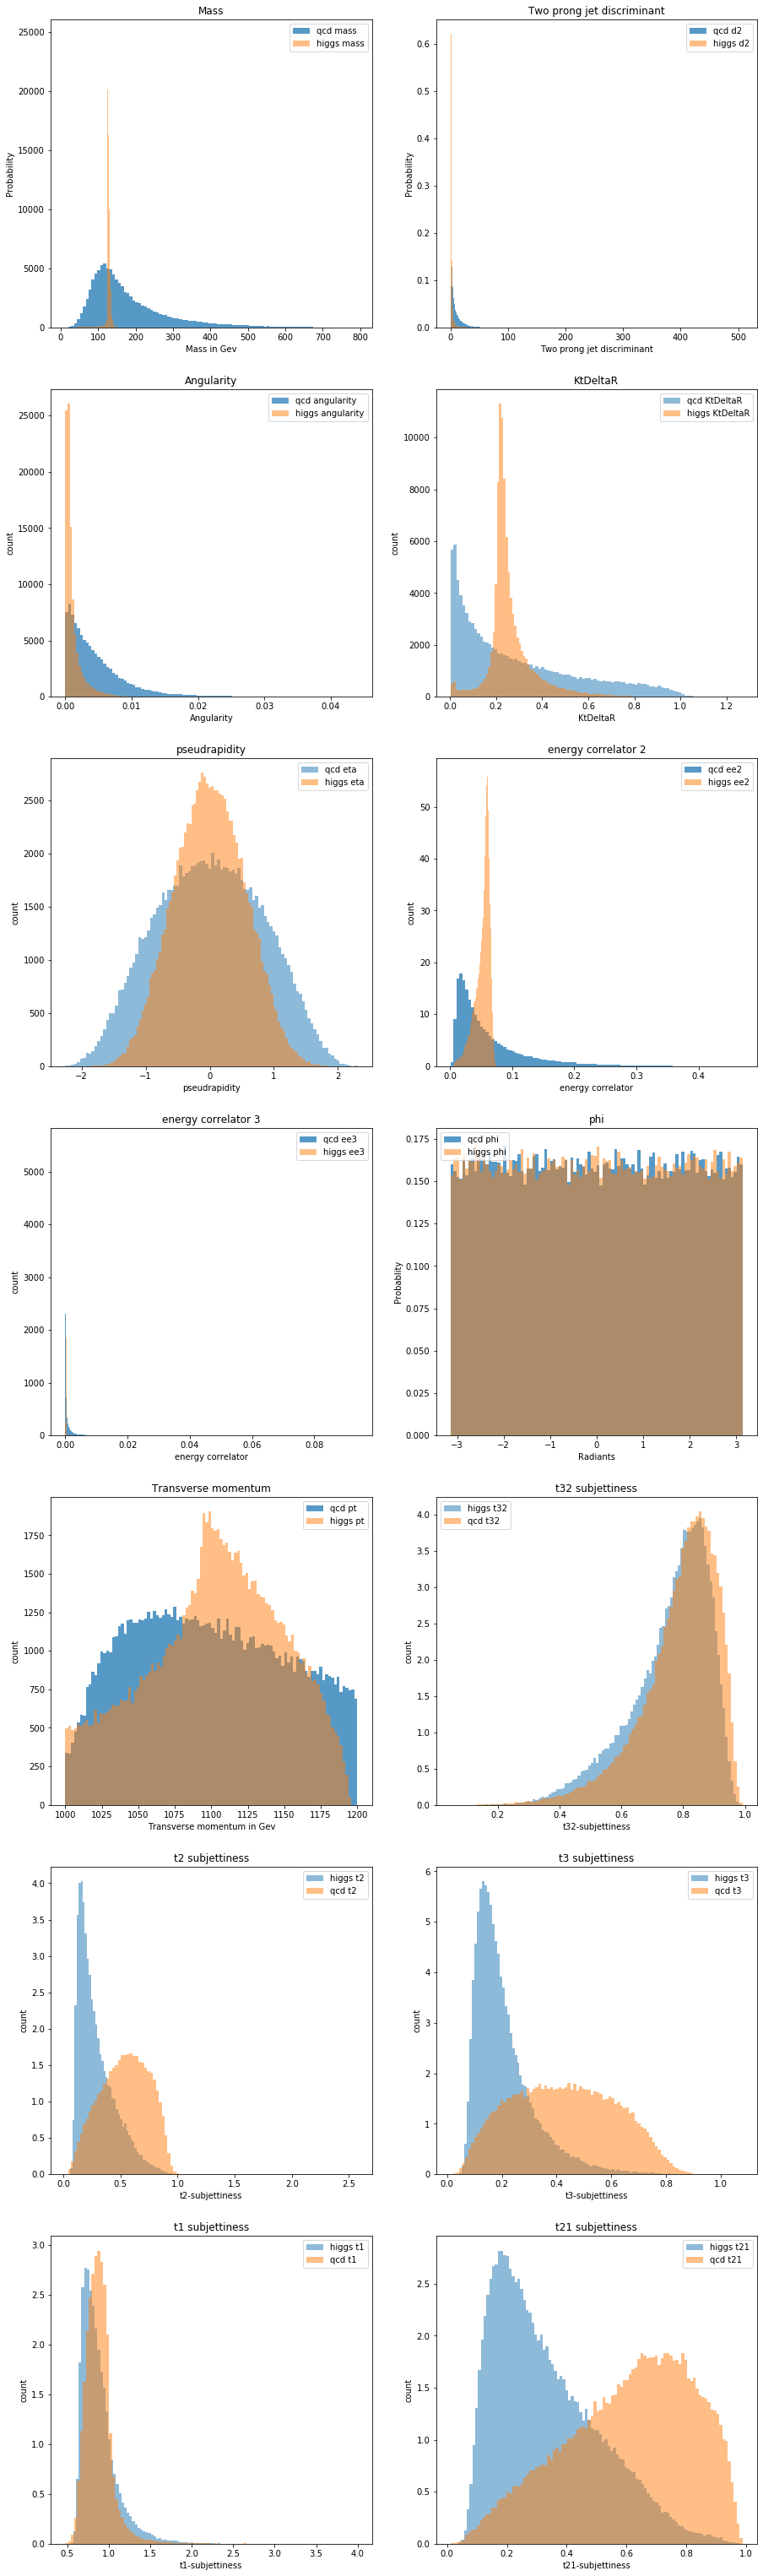

In [36]:
plt.rcParams["figure.figsize"] = (15,55)
plt.subplot(721)
plt.hist(qcdData['mass'], bins=100, density= False,label ='qcd mass',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['mass'], bins=100, density= False,label ='higgs mass',alpha=0.5)
plt.show
plt.title('Mass')
plt.ylabel('Probability')
plt.xlabel('Mass in Gev')
#plt.xlim([100,200])
plt.legend()

plt.subplot(722)
plt.hist(qcdData['d2'], bins=1000, density= True,label ='qcd d2',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.title('Two prong jet discriminant')
plt.hist(higgsData['d2'], bins=100, density= True,label ='higgs d2',alpha=0.5)
plt.show
plt.xlabel('Two prong jet discriminant')
#plt.xlim([0,20])
plt.ylabel('Probability')
plt.legend()

plt.subplot(723)
plt.hist(qcdData['angularity'], bins=100, density= False,label ='qcd angularity',alpha=0.7)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['angularity'], bins=100, density= False,label ='higgs angularity',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('Angularity')
plt.title('Angularity')
plt.legend()

plt.subplot(724)
plt.hist(qcdData['KtDeltaR'], bins=100, density= False,label ='qcd KtDeltaR',alpha=0.5)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['KtDeltaR'], bins=100, density= False,label ='higgs KtDeltaR',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR')
#plt.xlim([0,20])
plt.legend()

plt.subplot(725)
plt.hist(qcdData['eta'], bins=100, density= False,label ='qcd eta',alpha=0.5)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['eta'], bins=100, density= False,label ='higgs eta',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('pseudrapidity')
plt.title('pseudrapidity')
#plt.xlim([0,20])
plt.legend()



plt.subplot(726)
plt.hist(qcdData['ee2'], bins=100, density= True,label ='qcd ee2',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['ee2'], bins=100, density= True,label ='higgs ee2',alpha=0.5)
plt.show
#plt.xlim([0,0.20])
plt.legend()
plt.ylabel('count')
plt.xlabel('energy correlator')
plt.title('energy correlator 2')



plt.subplot(727)
plt.hist(qcdData['ee3'], bins=2000, density= True,label ='qcd ee3',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['ee3'], bins=100, density= True,label ='higgs ee3',alpha=0.5)
plt.show
#plt.xlim([0,0.0010])
plt.legend()
plt.ylabel('count')
plt.xlabel('energy correlator')
plt.title('energy correlator 3')

plt.subplot(728)
plt.hist(qcdData['phi'], bins=100, density= True,label ='qcd phi',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['phi'], bins=100, density= True,label ='higgs phi',alpha=0.5)
plt.show
plt.ylabel('Probablity')
plt.title('phi')
plt.xlabel('Radiants')
#plt.xlim([900,1290])
plt.legend()

plt.subplot(729)
plt.hist(qcdData['pt'], bins=100, density= False,label ='qcd pt',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['pt'], bins=100, density= False,label ='higgs pt',alpha=0.5)
plt.show
#plt.xlim([900,1290])
plt.ylabel('count')
plt.title('Transverse momentum')
plt.xlabel('Transverse momentum in Gev')
plt.legend()



plt.subplot(7,2,10)
plt.hist(higgsData['t32'], bins=100, density= True,label ='higgs t32',alpha=0.5)
plt.show
plt.hist(qcdData['t32'], bins=100, density= True,label ='qcd t32',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t32-subjettiness')
plt.title('t32 subjettiness')
plt.legend()



plt.subplot(7,2,11)
plt.hist(higgsData['t2'], bins=100, density= True,label ='higgs t2',alpha=0.5)
plt.show
plt.hist(qcdData['t2'], bins=100, density= True,label ='qcd t2',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t2-subjettiness')
plt.title('t2 subjettiness')
plt.legend()


plt.subplot(7,2,12)
plt.hist(higgsData['t3'], bins=100, density= True,label ='higgs t3',alpha=0.5)
plt.show
plt.hist(qcdData['t3'], bins=100, density= True,label ='qcd t3',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t3-subjettiness')
plt.title('t3 subjettiness')
plt.legend()


plt.subplot(7,2,13)
plt.hist(higgsData['t1'], bins=100, density= True,label ='higgs t1',alpha=0.5)
plt.show
plt.hist(qcdData['t1'], bins=100, density= True,label ='qcd t1',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t1-subjettiness')
plt.title('t1 subjettiness')
plt.legend()




plt.subplot(7,2,14)
plt.hist(higgsData['t21'], bins=100, density= True,label ='higgs t21',alpha=0.5)
plt.show
plt.hist(qcdData['t21'], bins=100, density= True,label ='qcd t21',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t21-subjettiness')
plt.title('t21 subjettiness')
plt.legend()

From this can see that Two prong jet discriminant, KtDeltaR and energy correlator 2 are very strong features for making cuts. But the mass cut just form looking at the overlaps on the graphs will give use the best cut. But all the features except for phi and t1 would be useful in making cuts to differing effects

Now let’s do another set of graphs but this time of the data after the mass cut

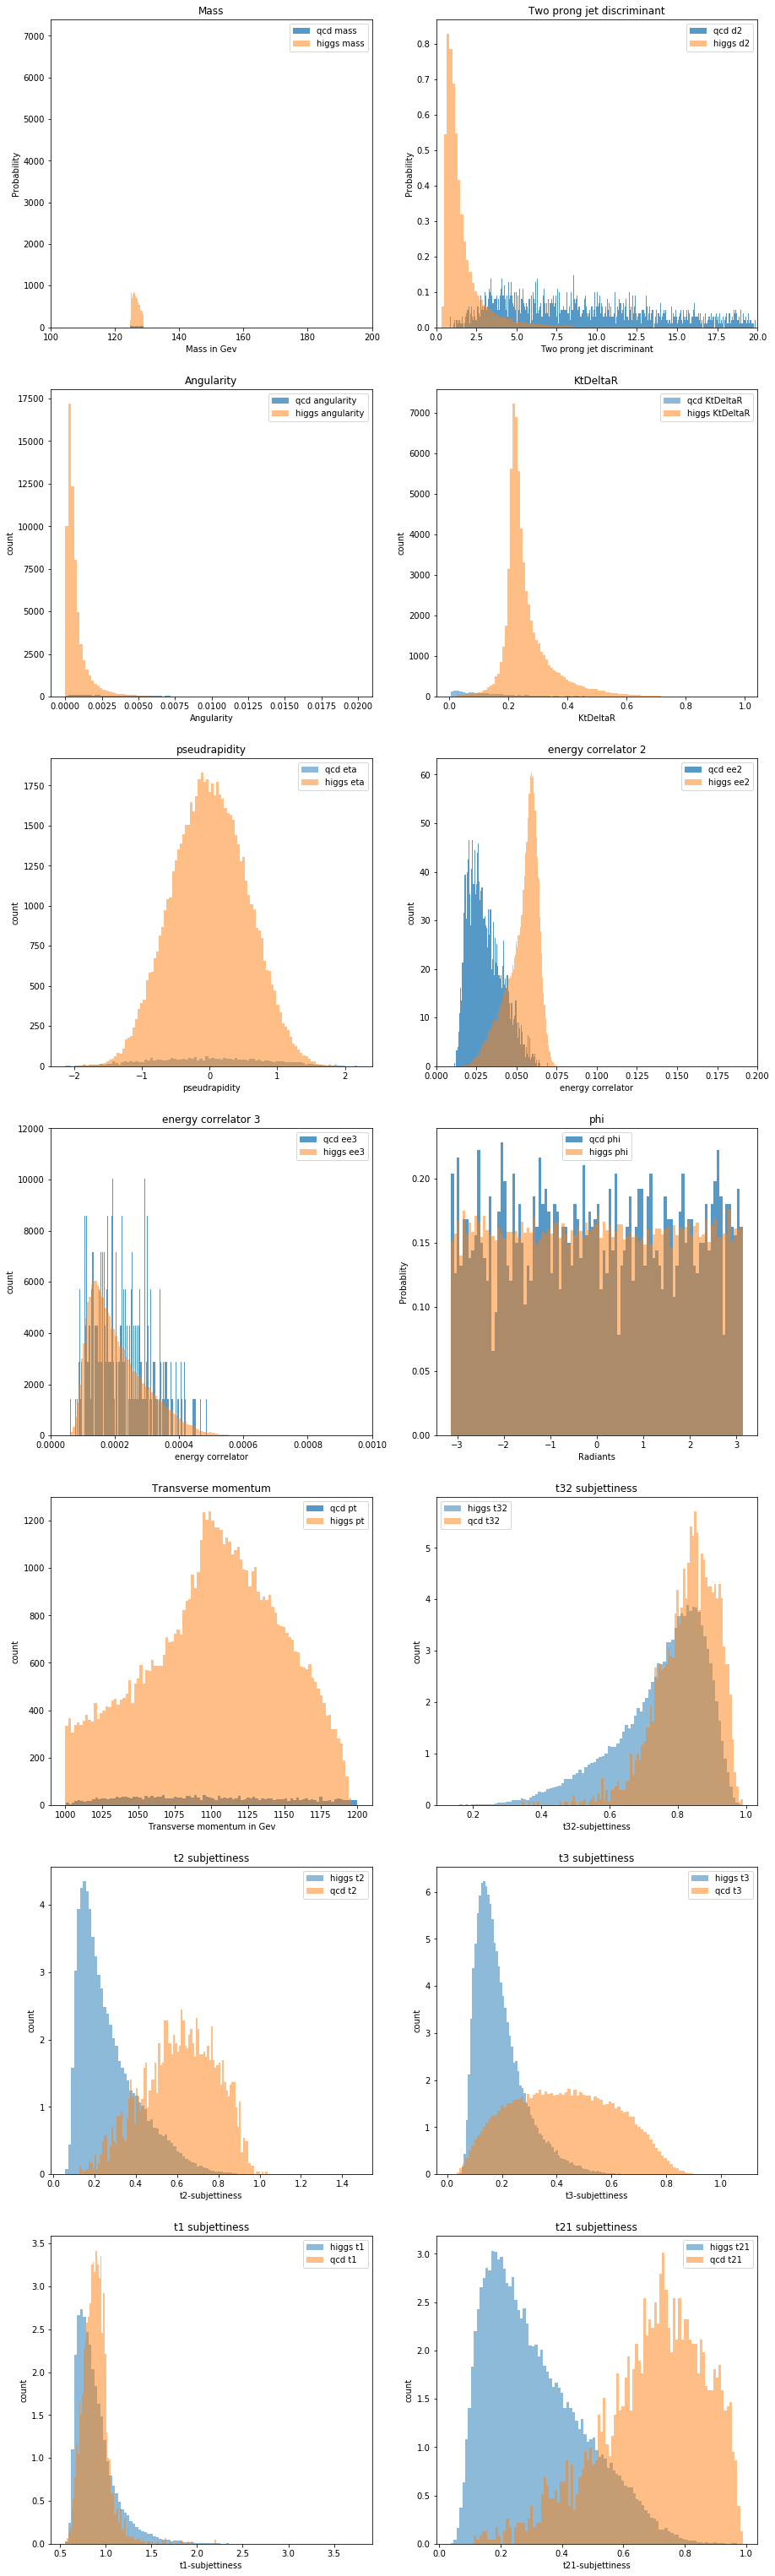

In [37]:
plt.rcParams["figure.figsize"] = (15,55)
plt.subplot(721)
plt.hist(qcdDataCut['mass'], bins=100, density= False,label ='qcd mass',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['mass'], bins=100, density= False,label ='higgs mass',alpha=0.5)
plt.show
plt.title('Mass')
plt.ylabel('Probability')
plt.xlabel('Mass in Gev')
plt.xlim([100,200])
plt.legend()

plt.subplot(722)
plt.hist(qcdDataCut['d2'], bins=1000, density= True,label ='qcd d2',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.title('Two prong jet discriminant')
plt.hist(higgsDataCut['d2'], bins=100, density= True,label ='higgs d2',alpha=0.5)
plt.show
plt.xlabel('Two prong jet discriminant')
plt.xlim([0,20])
plt.ylabel('Probability')
plt.legend()

plt.subplot(723)
plt.hist(qcdDataCut['angularity'], bins=100, density= False,label ='qcd angularity',alpha=0.7)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['angularity'], bins=100, density= False,label ='higgs angularity',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('Angularity')
plt.title('Angularity')
plt.legend()

plt.subplot(724)
plt.hist(qcdDataCut['KtDeltaR'], bins=100, density= False,label ='qcd KtDeltaR',alpha=0.5)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['KtDeltaR'], bins=100, density= False,label ='higgs KtDeltaR',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR')
#plt.xlim([0,20])
plt.legend()

plt.subplot(725)
plt.hist(qcdDataCut['eta'], bins=100, density= False,label ='qcd eta',alpha=0.5)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['eta'], bins=100, density= False,label ='higgs eta',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('pseudrapidity')
plt.title('pseudrapidity')
#plt.xlim([0,20])
plt.legend()



plt.subplot(726)
plt.hist(qcdDataCut['ee2'], bins=100, density= True,label ='qcd ee2',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['ee2'], bins=100, density= True,label ='higgs ee2',alpha=0.5)
plt.show
plt.xlim([0,0.20])
plt.legend()
plt.ylabel('count')
plt.xlabel('energy correlator')
plt.title('energy correlator 2')



plt.subplot(727)
plt.hist(qcdDataCut['ee3'], bins=2000, density= True,label ='qcd ee3',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['ee3'], bins=100, density= True,label ='higgs ee3',alpha=0.5)
plt.show
plt.xlim([0,0.0010])
plt.legend()
plt.ylabel('count')
plt.xlabel('energy correlator')
plt.title('energy correlator 3')

plt.subplot(728)
plt.hist(qcdDataCut['phi'], bins=100, density= True,label ='qcd phi',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['phi'], bins=100, density= True,label ='higgs phi',alpha=0.5)
plt.show
plt.ylabel('Probablity')
plt.title('phi')
plt.xlabel('Radiants')
#plt.xlim([900,1290])
plt.legend()

plt.subplot(729)
plt.hist(qcdDataCut['pt'], bins=100, density= False,label ='qcd pt',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsDataCut['pt'], bins=100, density= False,label ='higgs pt',alpha=0.5)
plt.show
#plt.xlim([900,1290])
plt.ylabel('count')
plt.title('Transverse momentum')
plt.xlabel('Transverse momentum in Gev')
plt.legend()



plt.subplot(7,2,10)
plt.hist(higgsDataCut['t32'], bins=100, density= True,label ='higgs t32',alpha=0.5)
plt.show
plt.hist(qcdDataCut['t32'], bins=100, density= True,label ='qcd t32',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t32-subjettiness')
plt.title('t32 subjettiness')
plt.legend()



plt.subplot(7,2,11)
plt.hist(higgsDataCut['t2'], bins=100, density= True,label ='higgs t2',alpha=0.5)
plt.show
plt.hist(qcdDataCut['t2'], bins=100, density= True,label ='qcd t2',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t2-subjettiness')
plt.title('t2 subjettiness')
plt.legend()


plt.subplot(7,2,12)
plt.hist(higgsDataCut['t3'], bins=100, density= True,label ='higgs t3',alpha=0.5)
plt.show
plt.hist(qcdData['t3'], bins=100, density= True,label ='qcd t3',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t3-subjettiness')
plt.title('t3 subjettiness')
plt.legend()


plt.subplot(7,2,13)
plt.hist(higgsDataCut['t1'], bins=100, density= True,label ='higgs t1',alpha=0.5)
plt.show
plt.hist(qcdDataCut['t1'], bins=100, density= True,label ='qcd t1',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t1-subjettiness')
plt.title('t1 subjettiness')
plt.legend()




plt.subplot(7,2,14)
plt.hist(higgsDataCut['t21'], bins=100, density= True,label ='higgs t21',alpha=0.5)
plt.show
plt.hist(qcdDataCut['t21'], bins=100, density= True,label ='qcd t21',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('t21-subjettiness')
plt.title('t21 subjettiness')
plt.legend()

The Two prong jet discriminant cut and KtDeltaR look ideal to make secound and third cuts

4.
Let’s try a Two prong jet discriminant cut first let’s try a range of Two prong jet discriminant after having done a mass cut in order to increase the significance

In [60]:
higgsCut2,bkgdCut2=cut(0,5,'d2',higgsDataCut,qcdDataCut)
t,v=cut(0,4,'d2',higgsDataCut,qcdDataCut)
higgsCut2,bkgdCut2=cut(0,2.5,'d2',higgsDataCut,qcdDataCut)
print("")
x=cut(1,5,'d2',higgsDataCut,qcdDataCut)
x=cut(1,4,'d2',higgsDataCut,qcdDataCut)


We get a simga significance of 7.074 for a cut from 0.0 to 5.0
number of higgs signla left 32.1
number of background signla left 12.4
We get a simga significance of 8.077 for a cut from 0.0 to 4.0
number of higgs signla left 31.3
number of background signla left 7.9
We get a simga significance of inf for a cut from 0.0 to 2.5
number of higgs signla left 28.5
number of background signla left 2.0

We get a simga significance of 4.592 for a cut from 1.0 to 5.0
number of higgs signla left 19.4
number of background signla left 12.3
We get a simga significance of 5.284 for a cut from 1.0 to 4.0
number of higgs signla left 18.6
number of background signla left 7.8


We see a great increase in the significance from this second cut, python cannot give us a value for the sigma and just displays inf so we will use the number of higgs signal to background signal left after the cut to see if we can get even better cuts while still having enough higgs signal to actually get a reading. right now, with just two cuts we have a "inf" sigma with 28.5 higg events left and just 2 background events. let's see if we can get the background mean to be under 1 for this length of a detection run using cut of the KtDeltaR.

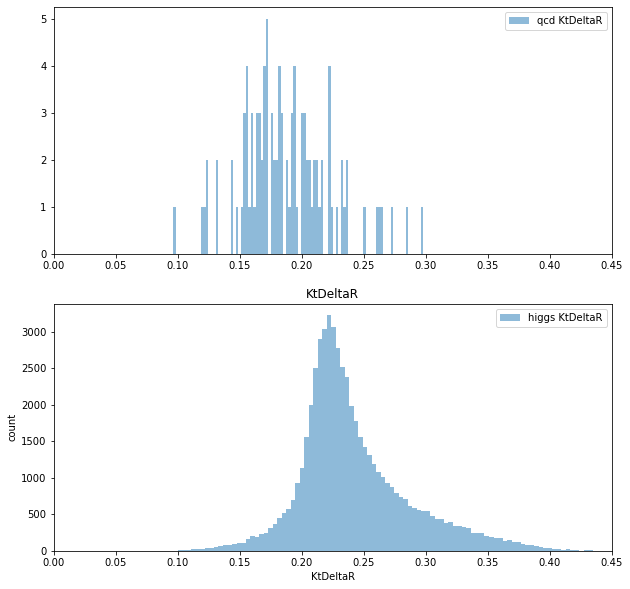

In [82]:
plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(2,1,1)
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(bkgdCut2['KtDeltaR'], bins=100, density= False,label ='qcd KtDeltaR',alpha=0.5)
plt.show
plt.xlim([0,0.45])
plt.legend()
plt.subplot(2,1,2)
plt.hist(higgsCut2['KtDeltaR'], bins=100, density= False, label ='higgs KtDeltaR',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR')
plt.xlim([0,0.45])
plt.legend()
#plt.xlim([0,20])

In [75]:
x=cut(0.1,0.7,'KtDeltaR',higgsCut2,bkgdCut2)
higgsCut3,bkgdCut3=cut(0.2,0.7,'KtDeltaR',higgsCut2,bkgdCut2)
(1-len(bkgdCut3)/len(qcdData))*100

We get a simga significance of inf for a cut from 0.1 to 0.7
number of higgs signla left 28.5
number of background signla left 2.0
We get a simga significance of inf for a cut from 0.2 to 0.7
number of higgs signla left 25.4
number of background signla left 0.7


99.964

After doing this cut we have been able to make the background signal mean to be 0.7 this needs to be taken with a grain of salt since we are only simulating 100000 background data points, and fluctuations in the model may have non trivial changes to this mean, A simulation with a larger number of events would help give more confidence in the figure. with that min mind thought we still are getting as signal count that is three orders of magnitude bigger, and with just three careful cuts we have been able to remove 99.964 of the background while still keeping over 50% of the higgs signal.


My lab partner and I were able to get very similar significances, one key difference was how much of the signal we each cut, I was able to. keep 50% of my signal after cuts while my lab partner had to cut a significantly more signal, hence in the lower moment run the higgs data overlaps more with the background making the high pt data set a better data set to do runs to find higg particles  